# Análisis de las carpetas de investigación aportados por la PGJ

Nota sobre los data: En la página donde viene la descripción de los data vienen dos links que supuestamente te llevan a los data, sin embargo ninguno de estos dos links sirve. Por lo que use los data que vienen en la sección de recursos que dice "Carpetas de Investigación de la FGJ". Quiero creer que estos data son los mismos o que al menos sirven para propósito de este ejercicio.  

Objetivo: Analizar los datos de la Agencia Digital de Innovación Pública sobre las carpetas de investigación aportados por la PGJ.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('carpetas_completa_marzo_2021.csv')

/home/meerkat/workspace/virtualenvs/datos_publicos/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(1188790, 19)

In [4]:
data.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
       'alcaldia_hechos', 'competencia', 'longitud', 'latitud', 'tempo'],
      dtype='object')

In [5]:
data.head(1)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN


<font size=5> Describe general y entendimiento de la base

Antes de iniciar con las preguntas verificare que en efecto esta base de data tenga relación con lo que dice en la descripción. Se supone que la base contiene información a partir de enero de 2016 y en la página hasta abajo dice que la última actualización a la base fue hecha el 26 de abril de 2021. No encontré ningúna descripción de las columnas en la página pero afortunadamente los nombres son bastante explicativos. Asumiré que fecha hechos corresponde a la fecha en que ocurrió el délito y que fecha_inicio corresponde a la fecha en que se registro el delito en la carpeta de investigación

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188790 entries, 0 to 1188789
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1188356 non-null  float64
 1   mes_hechos            1188356 non-null  object 
 2   fecha_hechos          1188356 non-null  object 
 3   ao_inicio             1188790 non-null  int64  
 4   mes_inicio            1188790 non-null  object 
 5   fecha_inicio          1188790 non-null  object 
 6   delito                1188790 non-null  object 
 7   fiscalia              1188788 non-null  object 
 8   agencia               1188790 non-null  object 
 9   unidad_investigacion  1188563 non-null  object 
 10  categoria_delito      1188790 non-null  object 
 11  calle_hechos          1185772 non-null  object 
 12  calle_hechos2         465963 non-null   object 
 13  colonia_hechos        1140410 non-null  object 
 14  alcaldia_hechos       1185543 non-

Se eliminaron los nulos para la variable "fecha hechos" ya que representaban solo el 0.04% del total y seguramente será conveniente tener esta variable en formato datetime. Considero que para este ejercicio no vale la pena intentar imputar los nulos para esta variable

In [7]:
data = data.dropna(subset=['fecha_hechos'])

La fecha inicio viene con errores (o eso creo) en algunos renglones, primero pense que era el formato de fecha que tiene excel pero intente transformarlo y me decía que el número era muy grande para ser transformado. Decidí no perder mucho tiempo en esto porque estos registros solo representaban el 1.7% de la tabla 

In [8]:
data['fecha_inicio'].head(5), data['fecha_inicio'].tail(5)

(0    2016-02-01 00:25:44
 1    2016-02-01 00:52:37
 2    2016-02-01 01:33:26
 3    2016-02-01 02:09:11
 4    2016-02-01 02:16:49
 Name: fecha_inicio, dtype: object,
 1188785    1617234672
 1188786    1617234772
 1188787    1617234830
 1188788    1617234997
 1188789    1617235175
 Name: fecha_inicio, dtype: object)

In [9]:
data = data[data['fecha_inicio'].str.startswith('20').fillna(False)]

In [10]:
data.shape

(1167854, 19)

In [11]:
data['fecha_hechos'] = data['fecha_hechos'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
data['fecha_inicio'] = data['fecha_inicio'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

## ¿Qué pruebas identificarías para asegurar la calidad de estos data?

* Verificaría duplicados
* Homologación de catálogos (se menciona en la página que hubo un cambio pero no dice en que status se dejó la tabla)
* Revisaría que las fechas hagan sentido y vengan en formato correcto (ya lo hice un poco en la parte de arriba)
* Revisaría una muestra pequeña a nivel registro para ver que los datos, hagan sentido. Al ser una base de México con datos que me son familiares, podría hacerlo
* Revisar valores máximos y mínimos, valores negativos

## ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los data?

Inicialmente se tenían 1,188,790 registros, sin embargo con los registros que se han tirado por nulidad o errores en el formato, nos quedamos con 1,167,854. La tabla contiene investigaciones registradas a partir de 2016 hasta 2021 para delitos ocurridos desde 1906 (asumiendo que no hay error en la captura de los datos)

In [12]:
data.fecha_inicio.dt.year.value_counts()

2018    255294
2019    250146
2017    228318
2020    203997
2016    197786
2021     32313
Name: fecha_inicio, dtype: int64

In [13]:
data.fecha_hechos.min()

Timestamp('1906-06-02 19:00:00')

## ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

Los datos contienen delitos ocurridos en otros lugares que no son CDMX por lo que primero filtraremos las alcadias de CDMX. Una explicación a esto podría ser porque el delito se denunció en CDMX aunque haya ocurrido en otro lado o porque se mezclo información de otros estados en esta base. 

In [14]:
alcaldias_cdmx = list(data.alcaldia_hechos.value_counts().head(16).index)

In [15]:
data_cdmx = data[data.alcaldia_hechos.isin(alcaldias_cdmx)]

Observaremos la distribución de delitos por delegación para validar que los datos hagan sentido y vemos que en efecto la mayoría de los delitos están concentrados en delegaciones consideradas "peligrosas" y en las que hay mucho movimiento diarimente.

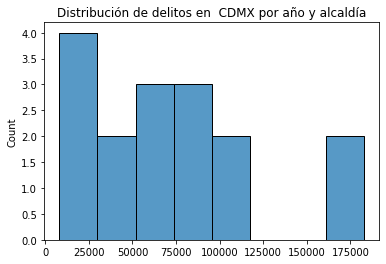

In [16]:
ax = (sns.histplot(data_cdmx.groupby(['alcaldia_hechos']).size(), bins=8)
      .set_title('Distribución de delitos en  CDMX por año y alcaldía'))

In [17]:
data_cdmx.alcaldia_hechos.value_counts()

CUAUHTEMOC                182663
IZTAPALAPA                175680
GUSTAVO A MADERO          117052
BENITO JUAREZ              97719
ALVARO OBREGON             78913
COYOACAN                   77835
MIGUEL HIDALGO             76250
TLALPAN                    68293
VENUSTIANO CARRANZA        67341
AZCAPOTZALCO               56757
IZTACALCO                  48687
XOCHIMILCO                 36463
TLAHUAC                    28166
LA MAGDALENA CONTRERAS     18815
CUAJIMALPA DE MORELOS      17171
MILPA ALTA                  8098
Name: alcaldia_hechos, dtype: int64

<font size=4>Distribución del número de delitos por tipo

La distribución no se puede apreciar porque se tiene valores muy atípicos para el conteo por tipo de delitos

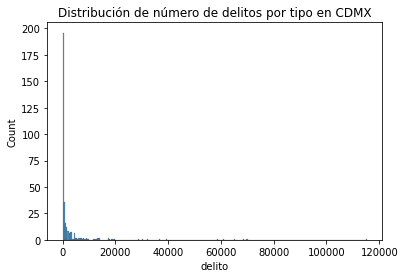

In [18]:
ax = sns.histplot(data_cdmx.delito.value_counts()).set_title('Distribución de número de delitos por tipo en CDMX')

Misma gráfica que la anterior pero con el conteo hasta el cuantil 95

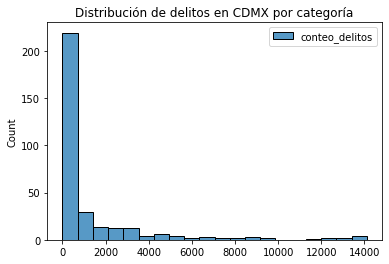

In [19]:
aux = data_cdmx.delito.value_counts().rename('conteo_delitos').reset_index()
ax = sns.histplot(aux[aux.conteo_delitos<aux.conteo_delitos.quantile(0.95)], bins=20).set_title('Distribución de delitos en CDMX por categoría')

<font size=4>Los 5 delitos más comunes en CDMX son: 

In [20]:
data_cdmx.delito.value_counts().head(5)

VIOLENCIA FAMILIAR              115314
FRAUDE                           69817
ROBO DE OBJETOS                  68505
ROBO A NEGOCIO SIN VIOLENCIA     65307
AMENAZAS                         61044
Name: delito, dtype: int64

## Identifica los delitos que van a la alza y a la baja en la CDMX en el último año, (ten cuidado con los delitos con pocas ocurrencias).

Supondremos que 10 es un buen mínimo de delitos para poder compararlo entre distintos años

In [21]:
delitos_preg4= list((data_cdmx.delito.value_counts()>10).index)

Para identificar los delitos que van a la alza o a la baja compararemos el número de delitos por tipo del último año contra el número de delitos por tipo en el año previo.

In [22]:
ultimo_anio = data_cdmx[(data_cdmx.fecha_inicio>=(data_cdmx.fecha_inicio.max()  - timedelta(days=365)))
                        & (data_cdmx.delito.isin(delitos_preg4))]
anio_previo = data_cdmx[(data_cdmx.fecha_inicio<=(data_cdmx.fecha_inicio.max()  - timedelta(days=365)))
                        & (data_cdmx.fecha_inicio>=(data_cdmx.fecha_inicio.max()  - timedelta(days=730)))
                        & (data_cdmx.delito.isin(delitos_preg4))]

In [23]:
pregunta_4 = (ultimo_anio.delito.value_counts().rename('conteo_ultimo_anio').reset_index()
 .merge(anio_previo.delito.value_counts().rename('conteo_anio_previo').reset_index()))

pregunta_4['cambios_ultimo_anio'] = (pregunta_4['conteo_ultimo_anio'] - pregunta_4['conteo_anio_previo'])/pregunta_4['conteo_anio_previo']

Al comparar el último año con el año previo se observa que para más de la mitad de los distintos tipos de delitos han disminuido las denuncias. Aunque sabemos que el último año podría estar subestimado por la pandemia ya que el confinamiento y el miedo a contagiarse pudo haber evitado que mucha gente presentara denuncias. Además que no estoy 100% segura que el catálogo este homologado por lo que un mismo delito podría estar apareciendo con distintos nombres.

In [24]:
pregunta_4.cambios_ultimo_anio.describe(percentiles = np.arange(0,1,0.1))

count    265.000000
mean       0.948469
std        4.832226
min       -0.961165
0%        -0.961165
10%       -0.629718
20%       -0.460883
30%       -0.375462
40%       -0.305121
50%       -0.211538
60%       -0.131936
70%        0.000000
80%        0.202308
90%        2.057692
max       50.500000
Name: cambios_ultimo_anio, dtype: float64

## ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

### Alcaldia con más delitos

In [25]:
data_cdmx.alcaldia_hechos.value_counts().head(1) 

CUAUHTEMOC    182663
Name: alcaldia_hechos, dtype: int64

### Alcaldia con menos delitos

In [26]:
data_cdmx.alcaldia_hechos.value_counts().tail(1) 

MILPA ALTA    8098
Name: alcaldia_hechos, dtype: int64

A pesar de que Milpa Alta es mucho más grande que Cuauhtemoc, las oportunidades de trabajo y muchas otras actividades están concentradas alrededor en Cuauhtemoc y sus alrededores. Por lo mismo es una delegación con mayor flujo de personas y de dinero entonces podría estar ocurriendo lo siguiente (entre otras cosas seguramente):

1.- En efecto hay más delitos

2.- Es más fácil presentar una denuncia porque existen más lugares para hacerlo 

3.- La gente de Cuautemoc ve valor en presentar denuncias porque son mejor atendidas que las de Milpa Alta

## Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [27]:
pregunta_6 = data_cdmx.groupby(['alcaldia_hechos', 'colonia_hechos']).size().rename('conteo_delitos').sort_values(ascending=False).reset_index()

In [28]:
for alcaldia in alcaldias_cdmx:
    print(f"\n{alcaldia}")
    print(pregunta_6[pregunta_6.alcaldia_hechos==alcaldia].head(3).colonia_hechos.values)


CUAUHTEMOC
['CENTRO' 'DOCTORES' 'ROMA NORTE']

IZTAPALAPA
['CENTRAL DE ABASTO' 'LOMAS DE SAN LORENZO'
 'DESARROLLO URBANO QUETZALCOATL']

GUSTAVO A MADERO
['LINDAVISTA' 'GUADALUPE TEPEYAC' 'SAN FELIPE DE JESÚS']

BENITO JUAREZ
['DEL VALLE CENTRO' 'NARVARTE' 'PORTALES SUR']

ALVARO OBREGON
['JARDINES DEL PEDREGAL' 'SAN ANGEL' 'ZEDEC SANTA FE']

COYOACAN
['PEDREGAL DE SANTO DOMINGO' 'AJUSCO' 'PEDREGAL DE SANTA URSULA']

MIGUEL HIDALGO
['POLANCO' 'ANAHUAC' 'LOMAS DE CHAPULTEPEC I SECCIÓN']

TLALPAN
['SAN ANDRÉS TOTOLTEPEC' 'HÉROES DE PADIERNA' 'TLALPAN CENTRO I']

VENUSTIANO CARRANZA
['JARDÍN BALBUENA' 'MOCTEZUMA 2A SECCIÓN' 'ZONA CENTRO']

AZCAPOTZALCO
['EL ROSARIO' 'INDUSTRIAL VALLEJO' 'CENTRO DE AZCAPOTZALCO']

IZTACALCO
['AGRÍCOLA ORIENTAL' 'AGRÍCOLA PANTITLAN' 'GRANJAS MÉXICO']

XOCHIMILCO
['SAN GREGORIO ATLAPULCO' 'SANTA CRUZ ACALPIXCA - PUEBLO'
 'SANTIAGO TEPALCATLALPAN']

TLAHUAC
['DEL MAR' 'MIGUEL HIDALGO' 'SAN FRANCISCO TLALTENCO']

LA MAGDALENA CONTRERAS
['SAN JERÓNIMO LÍDICE'

## ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

Planeaba usar esta librereía para resolver esta p regunta pero no me corrió a la primera y ya no le pude invertir más tiempo

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

## ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás

Al igual que en la pregunta 4 quite los delitos con pocas observaciones y porque me interesa el tema decidi juntar los delitos que inician con la palabra feminicidio

En el siguiente mapa de calor que muestra la distribución del número  de delitos por tipo para cada alcaldía vemos lo siguiente:
* El robo a negocio con violencia tiene una porcentaje de ocurrencia mucho mayor en Milpa Alta
* El homicidio por arma de fuego tiene una porcentaje de ocurrencia mucho mayor en Gustavo A Madero mientras que en Benito Juarez es muy bajo
* El feminicidio aunque tiene un porcentaje bajo respecto a otros delitos (seguramente porque algunos son registrados como algun tipo de homicidio), está presente en todas las alcaldías

In [30]:
aux = data_cdmx[data_cdmx.categoria_delito.isin(delitos_preg4)]
aux['delito'] = aux['delito'].apply(lambda x: 'FEMINICIDIO' if 'FEMINICIDIO' in x else x)

<ipython-input-30-a15cf6c63899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['delito'] = aux['delito'].apply(lambda x: 'FEMINICIDIO' if 'FEMINICIDIO' in x else x)


In [31]:
a = aux.groupby(['alcaldia_hechos', 'delito']).size()

In [32]:
data_preg8 = (a / a.groupby(level=0).sum()).rename('porcentaje_ocurrencia').reset_index()

In [33]:
data_preg8_ = data_preg8.pivot(index='delito', columns='alcaldia_hechos', values='porcentaje_ocurrencia')

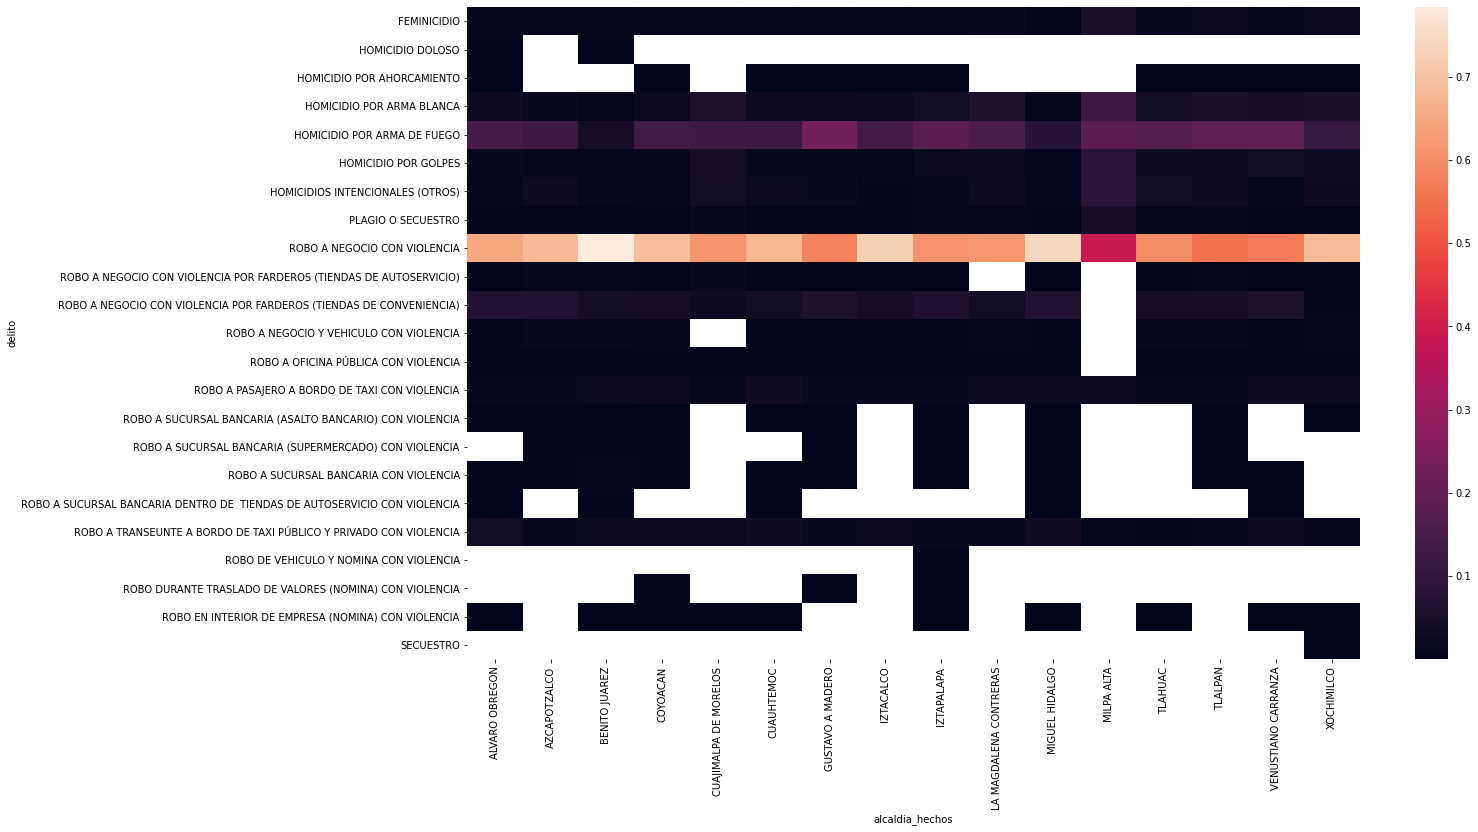

In [34]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(data_preg8_)

## Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. 

Usaremos la librería de geopandas y los shapefiles del inegi para identificar a que AGEB pertenece cada delito usando su latitud y longitud. Una vez que tengamos identificados los AGEB, veremos cuantos delitos de homicidios dolosos ocurrieron por AGEB, lo compararemos contra el número de habitantes para ese AGEB y obtendremos el indicar de "número de homicidios dolosos por cada 100 mil habitantes"

In [35]:
import geopandas as gpd

/home/meerkat/workspace/virtualenvs/datos_publicos/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Este shapefile fue obtenido de la siguiente liga https://www.inegi.org.mx/app/mapas/?t=0710000000000000&tg=3604#Busqueda_basica con el filtro para CDMX

In [36]:
ageb_sh = gpd.read_file('cdmx/09a.shp').to_crs(epsg=4326)

In [37]:
data_p9 = data_cdmx[data_cdmx.categoria_delito=='HOMICIDIO DOLOSO'].copy()
data_p9_geometry = gpd.GeoDataFrame(data_p9, geometry=gpd.points_from_xy(data_p9.longitud, data_p9.latitud)).set_crs(epsg=4326)
data_p9_ageb = gpd.sjoin(data_p9_geometry, ageb_sh, how='left')

In [38]:
homicidios_por_ageb = data_p9_ageb.groupby('cvegeo').size().rename('numero_homicidios_dolosos').reset_index()

Datos de población por ageb, obtenidos de esta liga: https://www.inegi.org.mx/sistemas/scitel/default?ev=7
Nota: Se uso el criterio de población total

In [39]:
poblacion = pd.read_csv('poblacion_por_ageb.txt', dtype={'ENTIDAD':str, 'MUN':str, 'LOC':str, 'AGEB': str})
poblacion['cvegeo'] = poblacion.apply(lambda x: x['ENTIDAD'] + x['MUN']+ x['LOC']+ x['AGEB'], axis=1)
poblacion_por_ageb = poblacion.groupby(['cvegeo'])['P_TOTAL'].sum().reset_index()

In [40]:
resp_p9 = homicidios_por_ageb.merge(poblacion_por_ageb, how='left')

Nota: Desafortunadamente para la base que encontre no viene la población para todos los agebs, pero en caso de tener los registros completos para todos los agebs este sería el procedimiento

In [41]:
resp_p9['P_TOTAL'].isnull().sum(), resp_p9.shape

(927, (1737, 3))

In [42]:
resp_p9.dropna(subset= ['P_TOTAL'], inplace=True)

In [43]:
resp_p9['indicador'] = resp_p9.apply(lambda x: 100000*x['numero_homicidios_dolosos']/x['P_TOTAL'] if x['P_TOTAL']>0 else 0, axis=1)

In [44]:
resp_p9.head()

,cvegeo,numero_homicidios_dolosos,P_TOTAL,indicador
49,0900200010701,1,2518.0,39.714059
50,0900200010716,1,8490.0,11.778563
51,0900200010720,1,6198.0,16.134237
52,090020001074A,1,6288.0,15.903308
53,0900200010754,1,5086.0,19.661817


### Pinta un mapa con este indicador. Describe los resultados.

Nota: No se visualizan todos los agebs ya que como comente en el punto anterior no encontre la población para todos.

In [45]:
data_mapa = ageb_sh.set_index("cvegeo").join(resp_p9.set_index("cvegeo"))

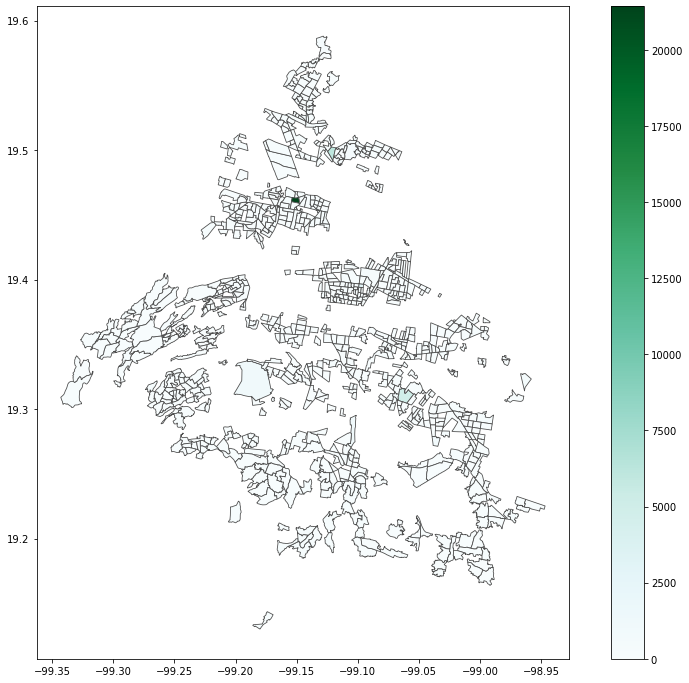

In [46]:
vmin, vmax = 0, data_mapa.indicador.max()
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa.plot(column='indicador', ax=ax, cmap='BuGn', linewidth=0.8, edgecolor='0.3')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

Tenemos casos en que la población es muy baja y hace que el indicador se vuelva muy grande. Esto hace que no veamos distinción en el mapa por los indicadores que son muy altos. Para ver un mapa un poco más ilustrativo filtraremos los indicadores que tienen una población mayor al percentil 10.

In [47]:
data_mapa_filtro = data_mapa[data_mapa.P_TOTAL>data_mapa.P_TOTAL.quantile(.1)]

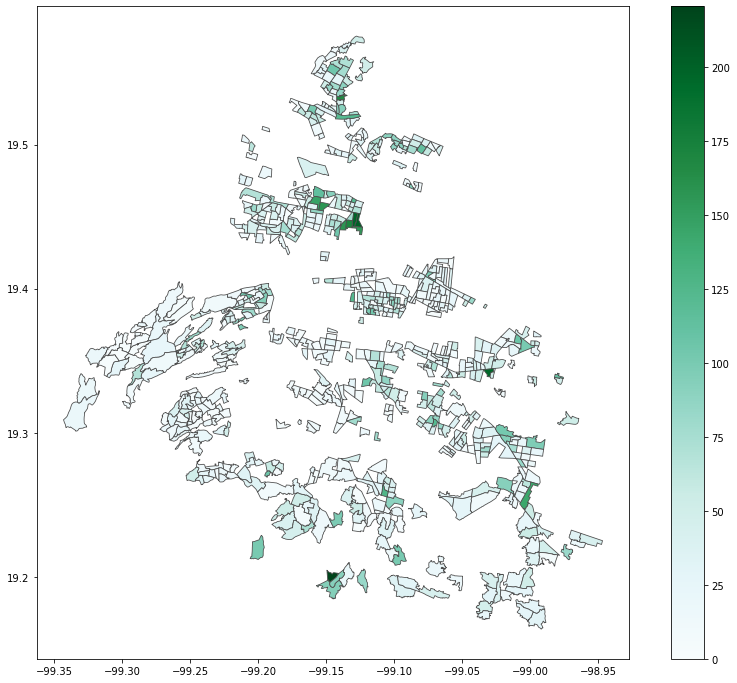

In [48]:
vmin, vmax = 0, data_mapa_filtro.indicador.max()
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa_filtro.plot(column='indicador', ax=ax, cmap='BuGn', linewidth=0.8, edgecolor='0.3')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

En este nuevo mapa vemos un poco mejor el valor que toma el indicador  por AGEB. A simple vista se observa que el indicador toma valores altos en la delegación Cuauhtemoc y en  la delegación Gustavo A Madero. Aunque ya lo sabiamos por los análisis previos

## ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? 
Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.)

Se creará un indicador de inseguridad por ageb que comparará el número de delitos que no sean: DELITO DE BAJO IMPACTO y HECHO NO DELICTIVO contra el área del ageb en m2. Este indicador sera un estimador de la concentración de delitos por km2. 

El indicador se construira de la siguiente forma: **Número de delitos registrados en ageb/area en km2**

In [49]:
# Se paso el poligono a proyección cea y se transformo a km2:
#"La proyección cilíndrica de áreas equivalentes presenta el mundo como un rectángulo,
#mientras mantiene las áreas relativas en un mapa."
ageb_sh['area'] = ageb_sh['geometry'].to_crs({'proj':'cea'}) .map(lambda p: p.area/ 10**6)

In [50]:
data_p10 = data_cdmx[~data_cdmx.categoria_delito.isin(['DELITO DE BAJO IMPACTO', 'HECHO NO DELICTIVO'])].copy()
data_p10_geometry = gpd.GeoDataFrame(data_p10, geometry=gpd.points_from_xy(data_p10.longitud, data_p10.latitud)).set_crs(epsg=4326)
data_p10_ageb = gpd.sjoin(data_p10_geometry, ageb_sh, how='left')

In [51]:
delitos_por_ageb = data_p10_ageb.groupby(['cvegeo']).size().rename('numero_delitos').reset_index()

In [52]:
data_mapa_10 = ageb_sh.set_index("cvegeo").join(delitos_por_ageb.set_index("cvegeo"))

In [53]:
data_mapa_10['indicador'] = data_mapa_10['numero_delitos']/data_mapa_10['area']

De acuerdo a este indicador se observa un mayor nivel de inseguridad para los AGEBS marcados en verde fuerte, es decir las alcadias de Cuauhtemoc, Miguel y Hidalgo y Benito Juárez

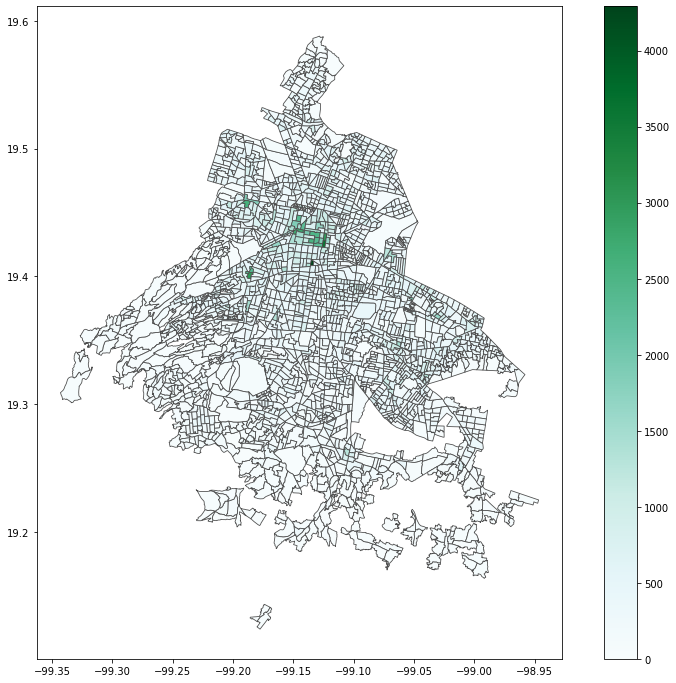

In [54]:
vmin, vmax = 0, data_mapa_10.indicador.max()
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa_10.plot(column='indicador', ax=ax, cmap='BuGn', linewidth=0.8, edgecolor='0.3')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

## Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos 
(hint: puedes usar algoritmos de Machine Learning no supervisados).

Para identificar patrones de concentración  o clusters con base en el  indicador de inseguridad que se creo en el inciso anterior usaremos el algoritmo de Kmeans (use este porque es el más facil y tengo poco tiempo). Las variables utilizadas serán las coordenadas del centroide del poligono y el indicador de inseguridad

In [55]:
from sklearn.cluster import KMeans

In [56]:
data_mapa_10["x"] = data_mapa_10.centroid.map(lambda p: p.x)
data_mapa_10["y"] = data_mapa_10.centroid.map(lambda p: p.y)

<ipython-input-56-87d62dafc8cf>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_mapa_10["x"] = data_mapa_10.centroid.map(lambda p: p.x)
<ipython-input-56-87d62dafc8cf>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_mapa_10["y"] = data_mapa_10.centroid.map(lambda p: p.y)


In [57]:
X = data_mapa_10[['indicador', 'x', 'y']].dropna()

Basandonos en el elbow method el número óptimo de clusters es 3

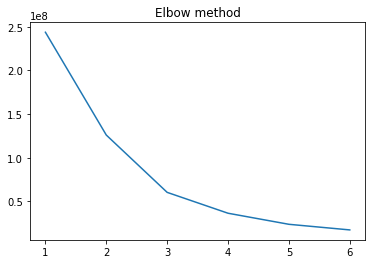

In [58]:
max_clusters=6
sscc = [] #Sum of squared distances of samples to their closest cluster center.
for i in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=14).fit(X)    
    sscc.append(kmeans.inertia_)
plt.plot(range(1,max_clusters+1), sscc)
plt.title("Elbow method")
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3, random_state=14).fit(X) 
X['labels'] = kmeans.labels_

In [60]:
data_mapa_11 = ageb_sh.set_index("cvegeo").join(X)

De acuerdo al algoritmo de Kmeans se encontraron 3 puntos de concentración dado la ubicación geográfica y el indicador de inseguridad

<AxesSubplot:>

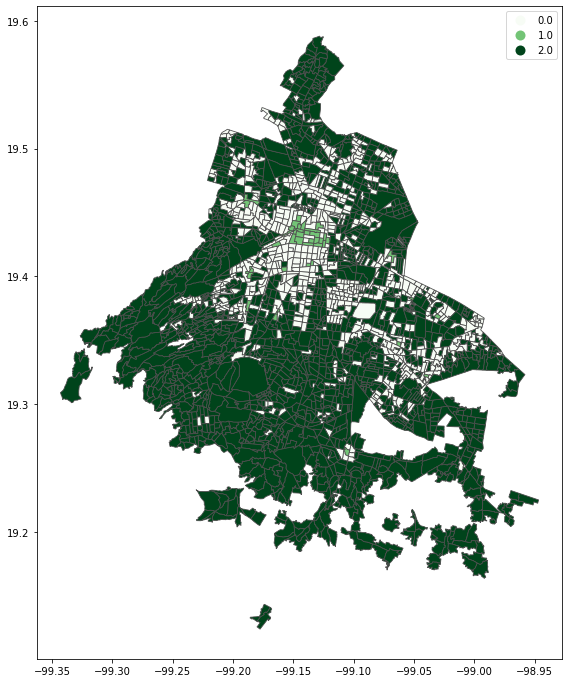

In [61]:
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa_11.plot(column='labels', ax=ax,linewidth=0.8, edgecolor='0.3',  cmap='Greens', legend=True, categorical=True)

### ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

Los puntos dentro de un mismo cluster justamente comparten las características con las que fueron construidos, que son en este caso la ubicación geográfica y el indicador de inseguridad. Por ejemplo sabemos que el cluster 1 es el que tiene mayor indice de inseguridad y esta asociado principalmente a la delegación Cuauhtemoc